In [1]:
from read_data import *
from hyper import *
from alignment import *
from copy import *
from datasets.preprecossing import *
import rpy2

folder_path = './datas/2/'
pcanum = 20

In [13]:
datas.to_df()

,NOC2L,HES4,ISG15,AGRN,C1orf159,SDF4,B3GALT6,UBE2J2,ACAP3,PUSL1,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC007325.4
AAACAAGTATCTCCCA-1.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,72.0,97.0,38.0,1.0,62.0,5.0,0.0,47.0,0.0
AAACAATCTACTAGCA-1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,15.0,16.0,10.0,2.0,14.0,3.0,0.0,7.0,0.0
AAACACCAATAACTGC-1.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,12.0,25.0,3.0,0.0,23.0,2.0,0.0,5.0,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,38.0,35.0,15.0,3.0,28.0,5.0,0.0,20.0,0.0
AAACAGCTTTCAGAAG-1.1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,65.0,77.0,27.0,2.0,51.0,10.0,0.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,46.0,64.0,23.0,1.0,40.0,4.0,0.0,27.0,0.0
TTGTTTCATTAGTCTA-1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,9.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0
TTGTTTCCATACAACT-1.1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,70.0,95.0,46.0,3.0,67.0,5.0,0.0,51.0,0.0
TTGTTTGTATTACACG-1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,15.0,19.0,10.0,3.0,19.0,2.0,0.0,11.0,0.0


In [8]:
datas = sc.read_h5ad("./datas/nature/151508_preprocessed.h5")
count_sub = datas.to_df()
xy_coords = datas.obs[['imagerow',"imagecol"]]
xy_coords.to_csv(folder_path+"xy.csv")
datas.obs.to_csv(folder_path+'meta_data.csv');
count_sub.T.to_csv(folder_path+"gene.csv")

In [17]:
("count_temp <- read.csv('{}',row.names='X')".format(folder_path + 'gene.csv'))


"count_temp <- read.csv('./datas/720/gene.csv',row.names='X')"

In [15]:
# robjects.r("load(paste0('./datas/pca/DLPFC/LIBD_sample1.RData'))")
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

Spatialpc  = importr('SpatialPCA')
ggplot2 = importr('ggplot2')
matrix = importr('Matrix')
robjects.r("xy_coords <- read.csv('{}',row.names='X')".format(folder_path + 'xy.csv'))
robjects.r("xy_coords=as.matrix(xy_coords)")
robjects.r("count_temp <- read.csv('{}',row.names='X')".format(folder_path + 'gene.csv'))
robjects.r('my_matrix <- do.call(cbind, count_temp)')
robjects.r('my_sparse_matrix <- Matrix(my_matrix, sparse = TRUE)')
robjects.r('count_sub <- as(my_sparse_matrix, "dgCMatrix")')
robjects.r('rownames(count_sub) <- rownames(count_temp)')
robjects.r("rownames(xy_coords) = colnames(count_sub)");
robjects.r('LIBD = CreateSpatialPCAObject(counts=count_sub, location=xy_coords, project = "SpatialPCA",gene.type="spatial",sparkversion="spark",numCores_spark=5,gene.number=3000, customGenelist=NULL,min.loctions = 20, min.features=20)')
robjects.r('LIBD = SpatialPCA_buildKernel(LIBD, kerneltype="gaussian", bandwidthtype="SJ",bandwidth.set.by.user=NULL)')
robjects.r('LIBD = SpatialPCA_EstimateLoading(LIBD,fast=FALSE,SpatialPCnum={})'.format(pcanum))
robjects.r('LIBD = SpatialPCA_SpatialPCs(LIBD, fast=FALSE)')
robjects.r('write.csv(as.data.frame(LIBD@SpatialPCs), file = "{}")'.format(folder_path + "pca.csv"))


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    ## Use SCTransform function in Seurat to normalize data. 


  |======================================================================| 100%


  |======================================================================| 100%


  |======================================================================| 100%







  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=====                                                                 |   7%
  |                                                                            
  |==========                                                            |  14%
  |                                                                            
  |===============                                                       |  21%
  |                                                                            
  |====================                                                  |  29%
  |                                                                            
  |=========================                                             |  36%
  |                                

## Use spark.test function in SPARK package to select spatially variable genes. 
## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  4220 
## number of total features:  9948 
## number of adjusted covariates:  0 
# fitting normalized count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...


In [16]:
folder_path

'./datas/720/'

In [2]:
adata1 = pd.read_csv(folder_path+"pca.csv")
adata1 = adata1.set_index(adata1.columns[0]).T
adata1.index = adata1.index.str.replace('.', '-')
adata1 = anndata.AnnData(adata1)

cell_meta = pd.read_csv(folder_path+"meta_data.csv")
cell_meta = cell_meta.set_index(cell_meta.columns[0])
adata1.obs = cell_meta
adata1.obsm['X_pca'] = adata1.to_df()
# # adata1.obs['celltype'] = cell_meta.values




/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_5801/953224956.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adata1.index = adata1.index.str.replace('.', '-')
/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_5801/953224956.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1 = anndata.AnnData(adata1)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
adata1.raw = adata1

sc.pp.neighbors(adata1,
                n_neighbors=10,
                use_rep='X_pca',
                random_state=1234
                )
sc.tl.diffmap(adata1,random_state=1234)
sc.tl.umap(adata1,random_state=1234)
sc.tl.leiden(adata1,random_state=1234,resolution = 0.5)
sc.tl.paga(adata1, groups='leiden')


In [4]:
set_initial_condition(adata1);


In [5]:
inter_gene = sort_data(adata1,adata1)

20 genes are used to calculate cost of tree alignment.



In [6]:
calculate_cluster_centroid_for_genes

<function datasets.preprecossing.calculate_cluster_centroid_for_genes(adata, gene_list, save_path='./')>

In [7]:
tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path)
tmp1

Unnamed: 0,17,2,19,15,10,11,18,16,13,20,5,1,4,6,7,8,12,14,9,3
0,0.074445,-2.213684,-0.059321,-0.022468,0.211345,-0.425186,-0.125524,-0.011834,0.131771,0.196886,0.206805,-4.520456,-0.124779,-0.506390,0.147810,0.561866,-0.099777,-0.051927,0.102731,0.258949
1,0.095535,-1.452555,0.044198,-0.238843,-0.063176,-0.170846,0.019624,0.097852,0.120059,-0.050896,-0.157287,2.598221,-1.202380,0.503642,-0.155307,-0.091663,-0.192677,0.193625,0.054634,0.013259
2,-0.066513,-2.307537,0.138925,0.281442,-0.406652,0.305164,0.029563,-0.050128,0.060336,-0.136574,0.084299,-3.920883,0.693264,-0.388934,-0.045436,-0.256270,0.138804,-0.073580,0.511299,-0.478705
3,0.182071,-0.873180,-0.218902,0.038182,-0.098618,0.107097,-0.324824,-0.440480,-0.074205,0.027051,-0.114618,0.080376,-0.808251,0.188698,-0.320820,-0.268312,0.135423,0.011278,-0.955099,1.393379
4,0.033503,4.014405,-0.049471,-0.096171,0.181426,0.076867,0.032579,0.132389,0.070569,-0.155264,-0.400909,-6.155461,-1.044841,0.880562,-0.018854,-0.011208,0.007037,0.299685,0.176392,-1.085564
5,0.041208,-2.259269,0.015606,-0.106354,0.687930,0.089228,-0.148217,0.265986,-0.340337,-0.169905,-0.599507,0.545755,0.700059,0.155235,0.404249,-0.039781,-0.183410,-0.108543,-0.206115,-1.914517
6,-0.202799,0.323078,0.075259,0.087361,-0.193653,-0.116826,0.139997,0.244612,-0.265103,0.155384,1.487711,2.928479,-0.788710,0.272326,-0.258076,0.323191,-0.060684,-0.208024,0.434666,0.467047
7,0.086838,1.294466,-0.129276,0.490225,0.139800,0.263380,-0.128949,-0.214831,0.265508,0.127359,0.333113,2.894293,1.374215,-0.050780,-0.579613,-0.372213,-0.140090,0.127568,0.002597,-0.079656
8,-0.020446,-0.651808,0.114159,-0.331353,-0.444045,-0.141205,-0.142154,-0.195143,0.262204,-0.144078,-0.878677,2.763957,0.789495,0.763758,-0.599518,-0.317993,0.489599,-0.072404,0.479316,-0.586979
9,-0.258633,0.631714,0.108451,-0.066494,-0.132803,0.296520,0.022823,-0.146724,-0.410360,-0.201513,1.206854,1.563471,-0.094827,-0.070282,0.215022,0.682482,0.263237,0.154909,-0.470829,0.696390


./datas/2/datas.data length:16
Generating all pairs superset


  0%|          | 0/1563 [00:00<?, ?ex/s]

100%|██████████| 1563/1563 [01:05<00:00, 24.00ex/s, loss=0.787558] 


	 Epoch 9 | average train loss: 0.915040
Optimization finished.


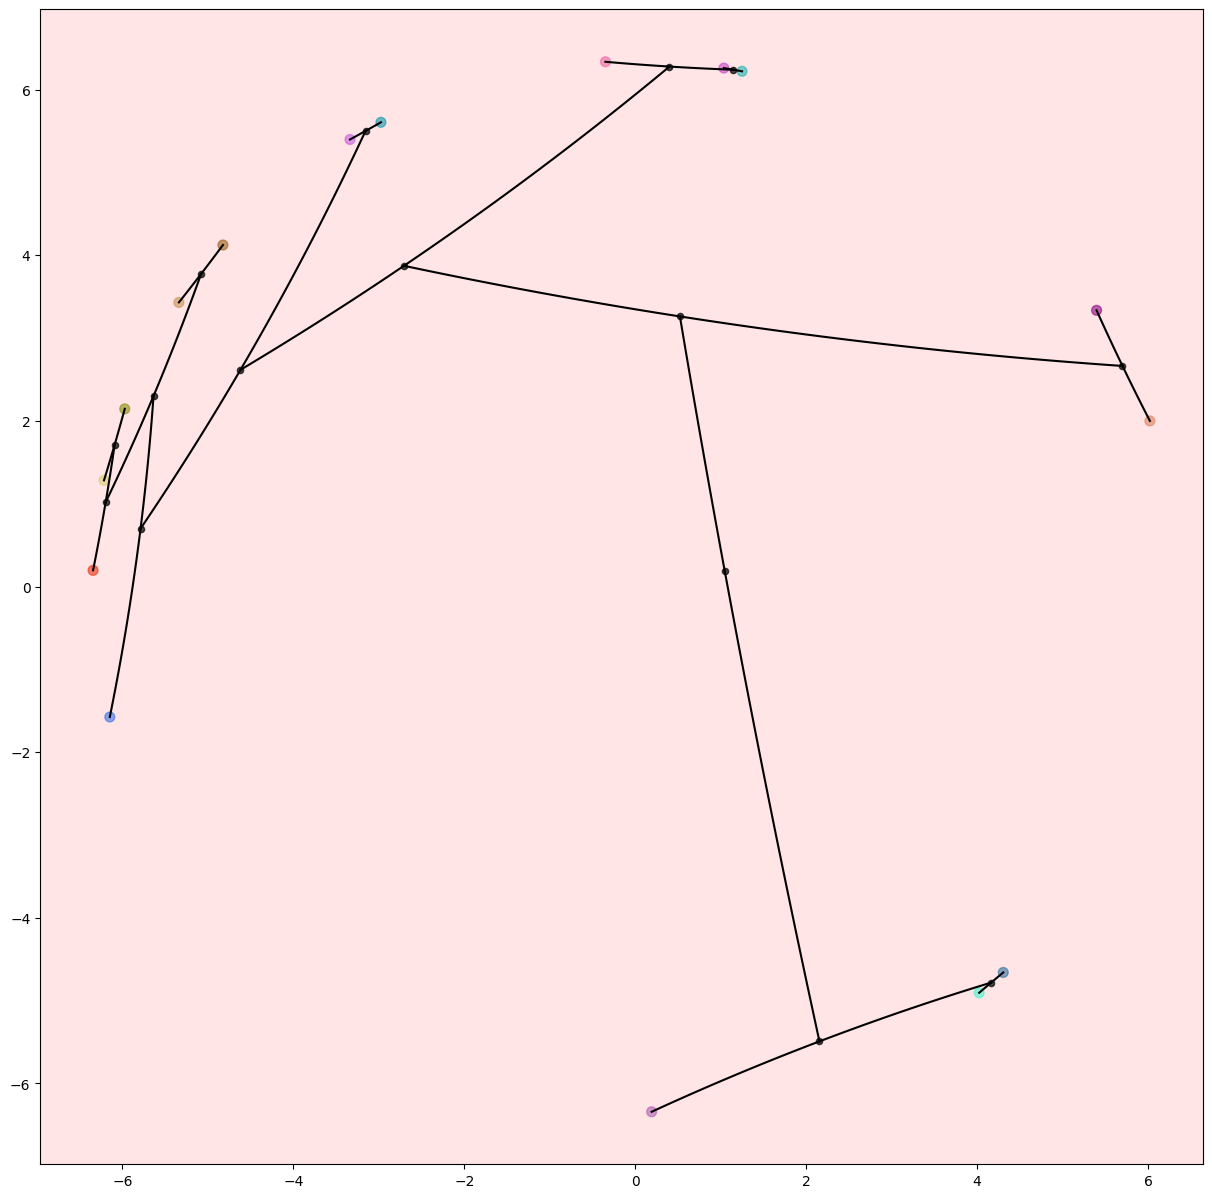

In [8]:
get_Hyper_tree(folder_path+'datas.data',1,tmp1.shape[1]+1,0,10,model_path=None,save_path=folder_path,c=0)


In [10]:
adata1.obs['leiden']

Unnamed: 0
AAACAACGAATAGTTC-1     3
AAACAAGTATCTCCCA-1     7
AAACAATCTACTAGCA-1     0
AAACACCAATAACTGC-1     4
AAACAGCTTTCAGAAG-1    13
                      ..
TTGTTGTGTGTCAAGA-1    11
TTGTTTCACATCCAGG-1    10
TTGTTTCATTAGTCTA-1     4
TTGTTTCCATACAACT-1    13
TTGTTTGTGTAAATTC-1     0
Name: leiden, Length: 4220, dtype: category
Categories (16, object): ['0', '1', '2', '3', ..., '12', '13', '14', '15']

In [12]:
nodes1,n1 = build_hyper_tree('./datas/1/')
# show_tree(nodes1[0]).show_fig()
nodes2,n2 = build_hyper_tree('./datas/2/')
# show_tree(nodes2[0]).show_fig()
T=tree_alignment(nodes1[0],nodes2[0],1);
minn = T.run_alignment();
T.show_ans();
ans = T.get_ans()
G=show_graph(ans,nodes1[0],nodes2[0]);
# G.show_fig()
print("average cost for one node:{}".format(minn/(n1+n2)))

The mininum cost for alignment is 33.64812030075188
The alignment edges list is [('26', '30'), ('25', '28'), ('3', '4'), ('14', '17'), ('4', '2'), ('2', '0'), ('24', '27'), ('23', '26'), ('22', '23'), ('17', '21'), ('15', '20'), ('9', '10'), ('1', '15'), ('7', '13'), ('11', '7'), ('18', '18'), ('10', '6'), ('6', '14'), ('21', '22'), ('19', '16'), ('8', '11'), ('0', '1'), ('5', '8')]
average cost for one node:0.5801400051853772


In [11]:
label1 = pd.read_csv("./datas/1/leiden.csv")
label1 = label1.set_index(label1.columns[0])
label1
label2 = pd.read_csv("./datas/2/leiden.csv")
label2 = label2.set_index(label2.columns[0])
label2

,leiden
Unnamed: 0,
AAACAACGAATAGTTC-1,3
AAACAAGTATCTCCCA-1,7
AAACAATCTACTAGCA-1,0
AAACACCAATAACTGC-1,4
AAACAGCTTTCAGAAG-1,13
...,...
TTGTTGTGTGTCAAGA-1,11
TTGTTTCACATCCAGG-1,10
TTGTTTCATTAGTCTA-1,4


In [14]:
all = len(label1);
count =0;
for i in range(len(label1)):
    l1 = label1.iloc[i][0];
    l2 = label2.iloc[i][0];
    if(ans.__contains__( (str(l1),str(l2)) ) ):
        count +=1
print(count/all);

0.17677725118483412


In [37]:
preprocessing_st_cluster(datas)
# set_initial_condition(datas)



         Falling back to preprocessing with `sc.pp.pca` and default params.


In [46]:
datas.obsm['X_pca'].shape

(4220, 50)

In [9]:
datas.obs

,in_tissue,array_row,array_col,imagerow,imagecol,sum_umi,sum_gene,subject,position,replicate,...,layer_guess_reordered_short,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts
AAACAACGAATAGTTC-1,1,0,16,113.141318,147.434749,948,727,Br5292,0,1,...,L1,727,6.590301,948.0,6.855409,22.362869,32.911392,44.409283,76.054852,914.0
AAACAAGTATCTCCCA-1,1,50,102,383.438357,413.051319,4261,2170,Br5292,0,1,...,L3,2170,7.682943,4261.0,8.357493,24.994133,31.471486,40.154893,56.817648,4166.0
AAACAATCTACTAGCA-1,1,3,43,129.522957,231.008109,1969,1093,Br5292,0,1,...,L1,1093,6.997596,1969.0,7.585789,34.128999,42.001016,52.158456,69.883189,1904.0
AAACACCAATAACTGC-1,1,59,19,431.188134,155.805586,3368,1896,Br5292,0,1,...,WM,1896,7.548029,3368.0,8.122372,22.446556,29.928741,39.994062,58.491686,3229.0
AAACAGCTTTCAGAAG-1,1,43,9,344.869499,125.067511,2981,1620,Br5292,0,1,...,L6,1620,7.390799,2981.0,8.000349,27.172090,34.149614,44.112714,62.428715,2909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,280.783088,335.913603,2337,1320,Br5292,0,1,...,L3,1320,7.186144,2337.0,7.757051,30.851519,38.040223,47.411211,64.912281,2286.0
TTGTTTCACATCCAGG-1,1,58,42,426.012616,227.047713,2331,1444,Br5292,0,1,...,L6,1444,7.275865,2331.0,7.754481,22.779923,30.072930,40.669241,59.502360,2267.0
TTGTTTCATTAGTCTA-1,1,60,30,436.678683,189.828989,819,629,Br5292,0,1,...,WM,629,6.445720,819.0,6.709304,25.030525,35.409035,47.619048,84.249084,784.0
TTGTTTCCATACAACT-1,1,45,27,355.805593,180.783085,3092,1697,Br5292,0,1,...,L6,1697,7.437206,3092.0,8.036897,25.582147,32.794308,42.658473,61.287193,3015.0


In [5]:
test =  pd.read_csv('./datas/719/pca.csv')
test = test.set_index(test.columns[0])
test

,AAACAACGAATAGTTC.1,AAACAAGTATCTCCCA.1,AAACAATCTACTAGCA.1,AAACACCAATAACTGC.1,AAACAGCTTTCAGAAG.1,AAACAGGGTCTATATT.1,AAACAGTGTTCCTGGG.1,AAACATTTCCCGGATT.1,AAACCACTACACAGAT.1,AAACCCGAACGAAATC.1,...,TTGTGTATGCCACCAA.1,TTGTGTTTCCCGAAAG.1,TTGTTAGCAAATTCGA.1,TTGTTCAGTGTGCTAC.1,TTGTTCTAGATACGCT.1,TTGTTGTGTGTCAAGA.1,TTGTTTCACATCCAGG.1,TTGTTTCATTAGTCTA.1,TTGTTTCCATACAACT.1,TTGTTTGTGTAAATTC.1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,-1.742179,4.208592,-8.122478,-15.563433,2.585480,-0.571400,-4.745038,1.989525,4.170938,2.596544,...,1.601800,3.069908,3.371156,3.153809,0.210978,3.602209,-0.240509,-10.261098,1.487125,-4.602841
2,-0.050372,-0.188750,8.238340,-8.868978,-1.649134,-2.296564,-4.615797,-3.802923,4.961100,1.048257,...,-3.100365,-4.016083,1.147432,2.833683,-2.487486,2.274316,-3.556936,-7.747452,-2.249188,6.964852
3,0.172844,-0.850747,-2.817448,5.220857,-0.027134,1.547148,0.705489,-1.896522,3.747851,-0.011553,...,-0.823501,-0.971786,0.185960,1.740142,-1.298287,0.859793,1.898851,1.222923,-0.216891,-1.650097
4,2.192438,-0.732998,-3.844993,-4.435772,-0.087575,0.318647,-0.741601,2.685640,0.726184,1.815685,...,-0.876923,-0.442207,-2.325353,-0.456158,1.443258,-1.887574,-0.375175,2.723484,-0.783052,-2.024797
5,-0.777553,1.336927,-1.577289,2.248321,-3.085096,-2.976059,-0.005429,-0.696005,0.332314,1.767681,...,-1.941323,-1.270356,1.915761,0.838848,-0.092483,1.028837,-2.388757,2.947516,-1.696337,-0.920072
6,-4.132174,1.366941,-0.367433,1.530303,-1.255844,-0.580191,-0.992041,2.105831,1.580622,2.309779,...,1.348670,1.146837,0.326176,0.435541,-2.056775,0.160600,0.033545,-2.285964,-0.783625,-0.299170
7,1.636083,1.130777,-0.526728,-0.325219,1.381870,0.562941,-0.268462,-1.688192,-1.313471,1.031371,...,-1.471882,-1.323629,-0.014936,0.389861,2.197608,-0.779891,-0.173732,-0.099366,-1.163087,-2.350509
8,1.739748,-0.353206,0.374770,-1.786930,-1.967390,-1.827987,1.113099,-0.393713,-1.294134,-1.056978,...,1.341084,0.830147,-0.017597,0.002471,-0.872782,0.649933,1.782998,1.651121,-0.376955,-0.495665
9,0.270036,-0.060463,1.681578,-0.099736,-3.015521,-2.413598,0.336453,0.352749,1.674870,-0.029065,...,-0.284918,-0.006385,-0.070385,-0.973102,0.627318,0.058348,-1.256519,-2.607931,0.232594,-0.056054


In [ ]:
get_Hyper_tree()